# Credit Fraud Detection


## Data Exploration
we start by basic exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
#load data
data_train_path=(r"data/split/train.csv")


In [3]:
df_train=pd.read_csv(data_train_path)

In [4]:
df_train.shape

(170884, 31)

In [5]:
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [6]:
df_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

we have two clear features time and amount and for security purposes we have hashed features (28) 

In [7]:
df_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,...,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,94966.107886,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,...,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,88.511723,0.001785
std,47464.723773,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,...,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,256.737144,0.042210
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54348.000000,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,...,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,5.637500,0.000000
50%,84923.500000,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,...,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,22.020000,0.000000
75%,139404.000000,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,...,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,77.650000,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


In [8]:
#check of duplicates 
df_train.duplicated().sum()


448

In [9]:
#checking nulls
df_train.isna().sum().sum()

0


- my intution is it will be an imbalanced data set

In [10]:
df_train["Class"].value_counts()

print('NON Frauds', round(df_train['Class'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Frauds', round(df_train['Class'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')



NON Frauds 99.82 % of the dataset
Frauds 0.18 % of the dataset


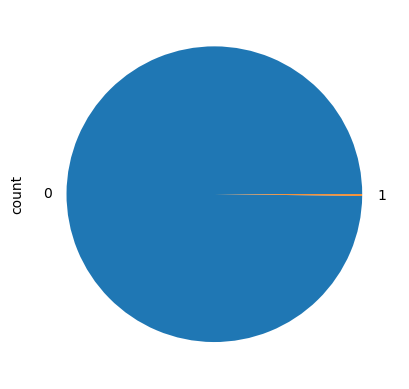

In [11]:
df_train["Class"].value_counts().plot(kind="pie")
plt.show()

Take note of how unbalanced our  dataset The majority of transactions are non-fraudulent, algorithms are likely to overfit because they will "learn" that most transactions are not fraud

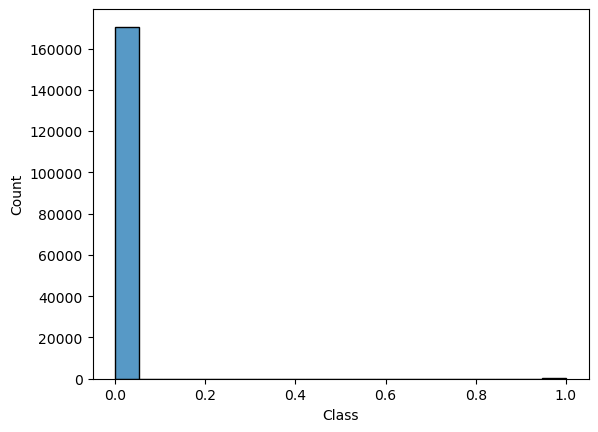

In [12]:

sns.histplot(df_train["Class"])
plt.show()

from data distrbiton  we can see how skewed is data we should deal with this in modeling 

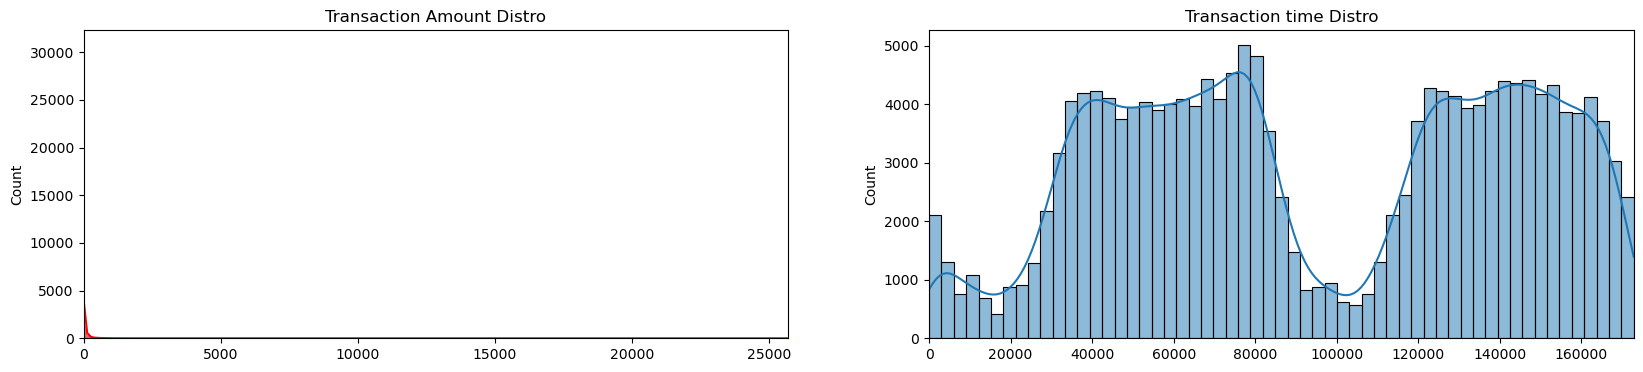

In [13]:
fig,ax=plt.subplots(1,2,figsize=(20,4))
amount=df_train["Amount"].values
time=df_train["Time"].values
sns.histplot(amount,ax=ax[0],color='r',kde=True)
ax[0].set_title('Transaction Amount Distro')
ax[0].set_xlim([min(amount),max(amount)])
sns.histplot(time,ax=ax[1],kde=True)
ax[1].set_title('Transaction time Distro')
ax[1].set_xlim([min(time),max(time)])
plt.show()

let'see the correlation

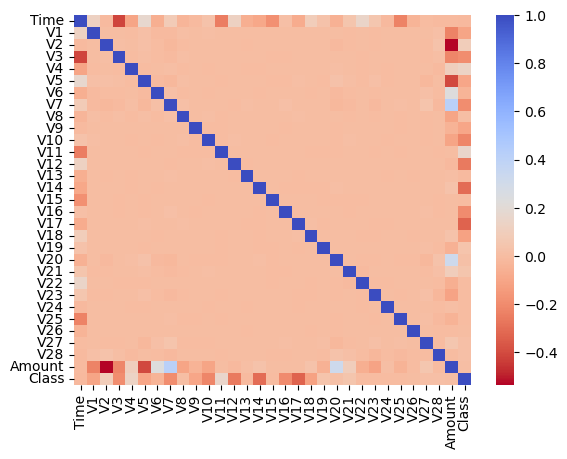

In [14]:
corr=df_train.corr()
sns.heatmap(corr,cmap="coolwarm_r",annot_kws={'size':20},xticklabels=df_train.columns,yticklabels=df_train.columns)
plt.show()

Plot Distribution of each feature


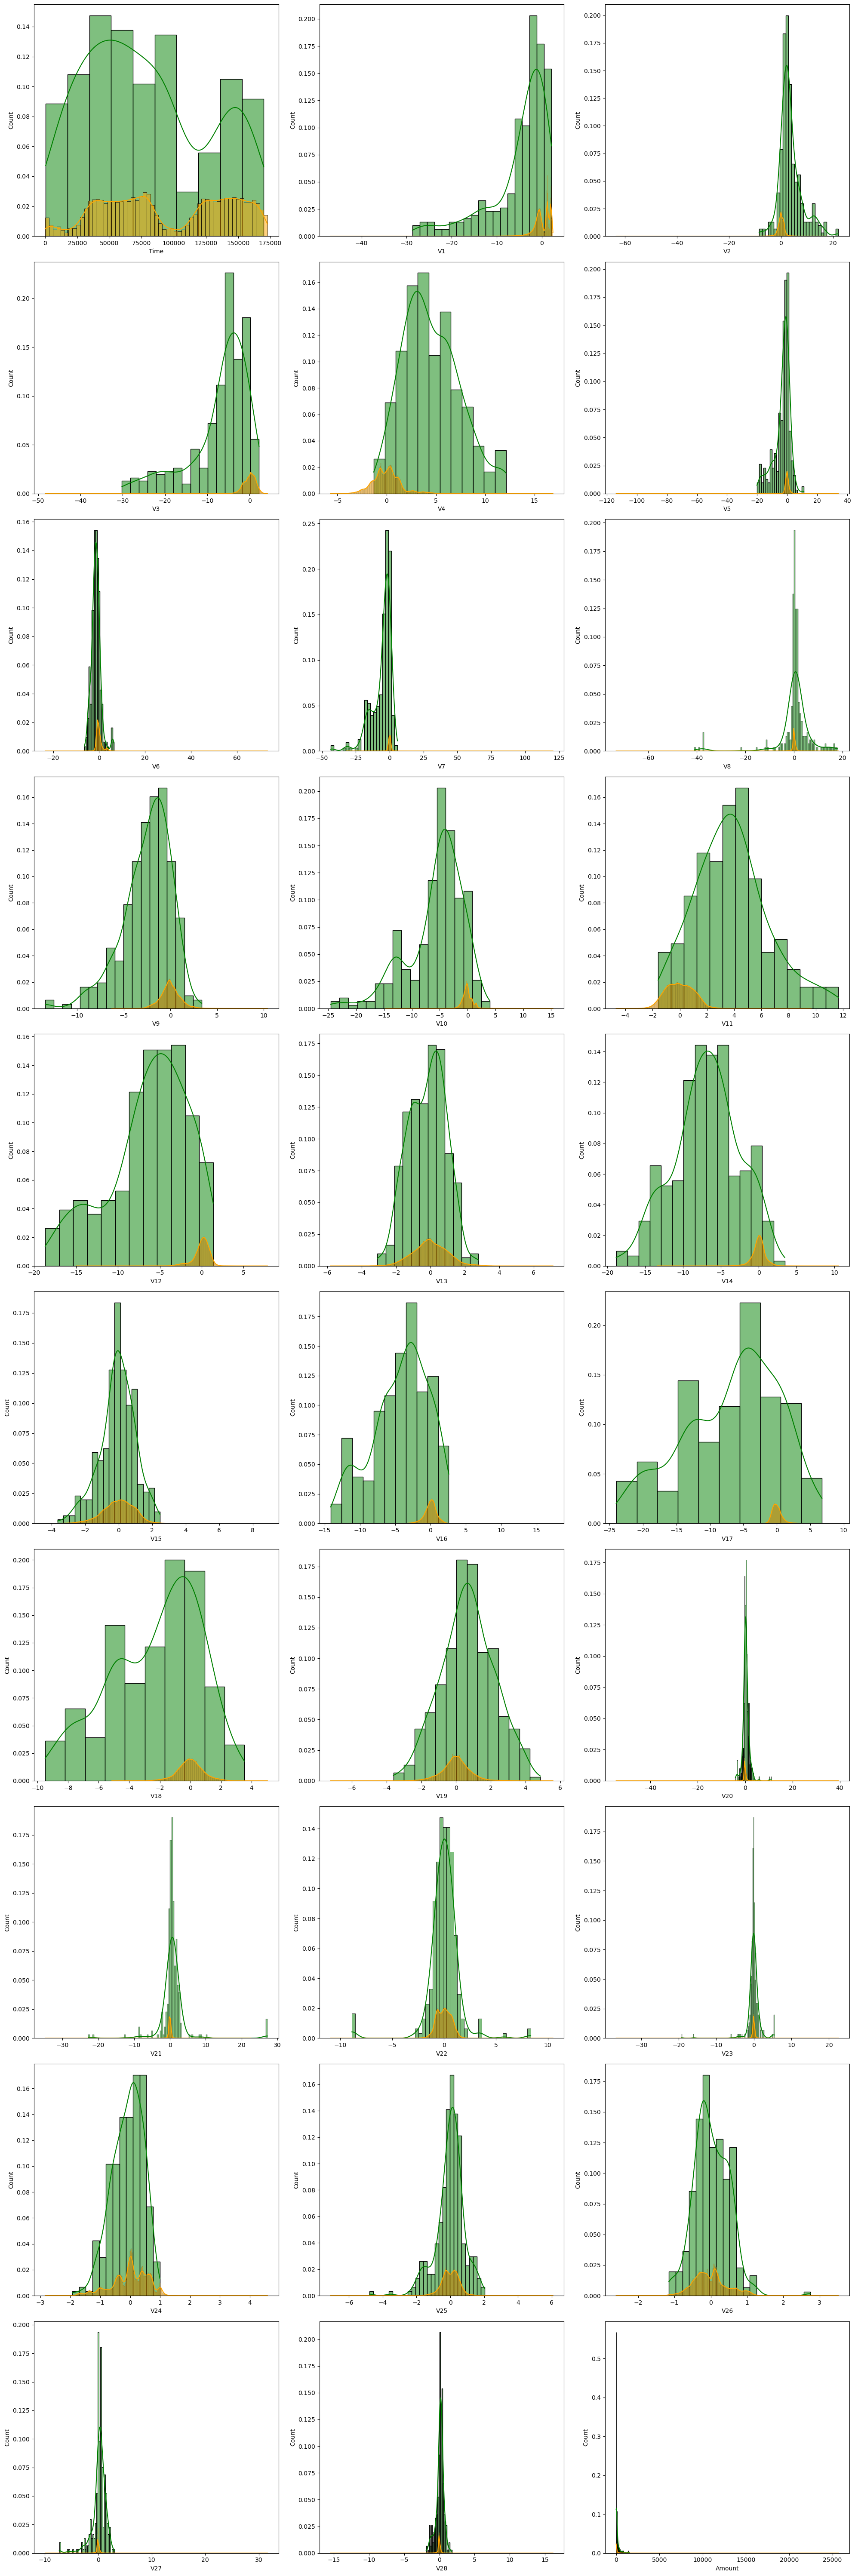

In [15]:
frauds=df_train["Class"]==1
non_frauds=df_train["Class"]==0
fig=plt.figure(figsize=(20,60))
for i,col in enumerate(df_train.columns.to_list()):
    if col=="Class":
        continue
    plt.subplot(10,3,i+1)
    sns.histplot(df_train[col][frauds],color='green',label='Fraud',kde=True,fill=True,stat='probability')
    sns.histplot(df_train[col][non_frauds],color='orange',label='NON_Fraud',kde=True,fill=True,stat='probability')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()










time:both classes are some what evenly distrbuted
v1:v28:varying
amount:non fraud shows higher probablity in small amounts

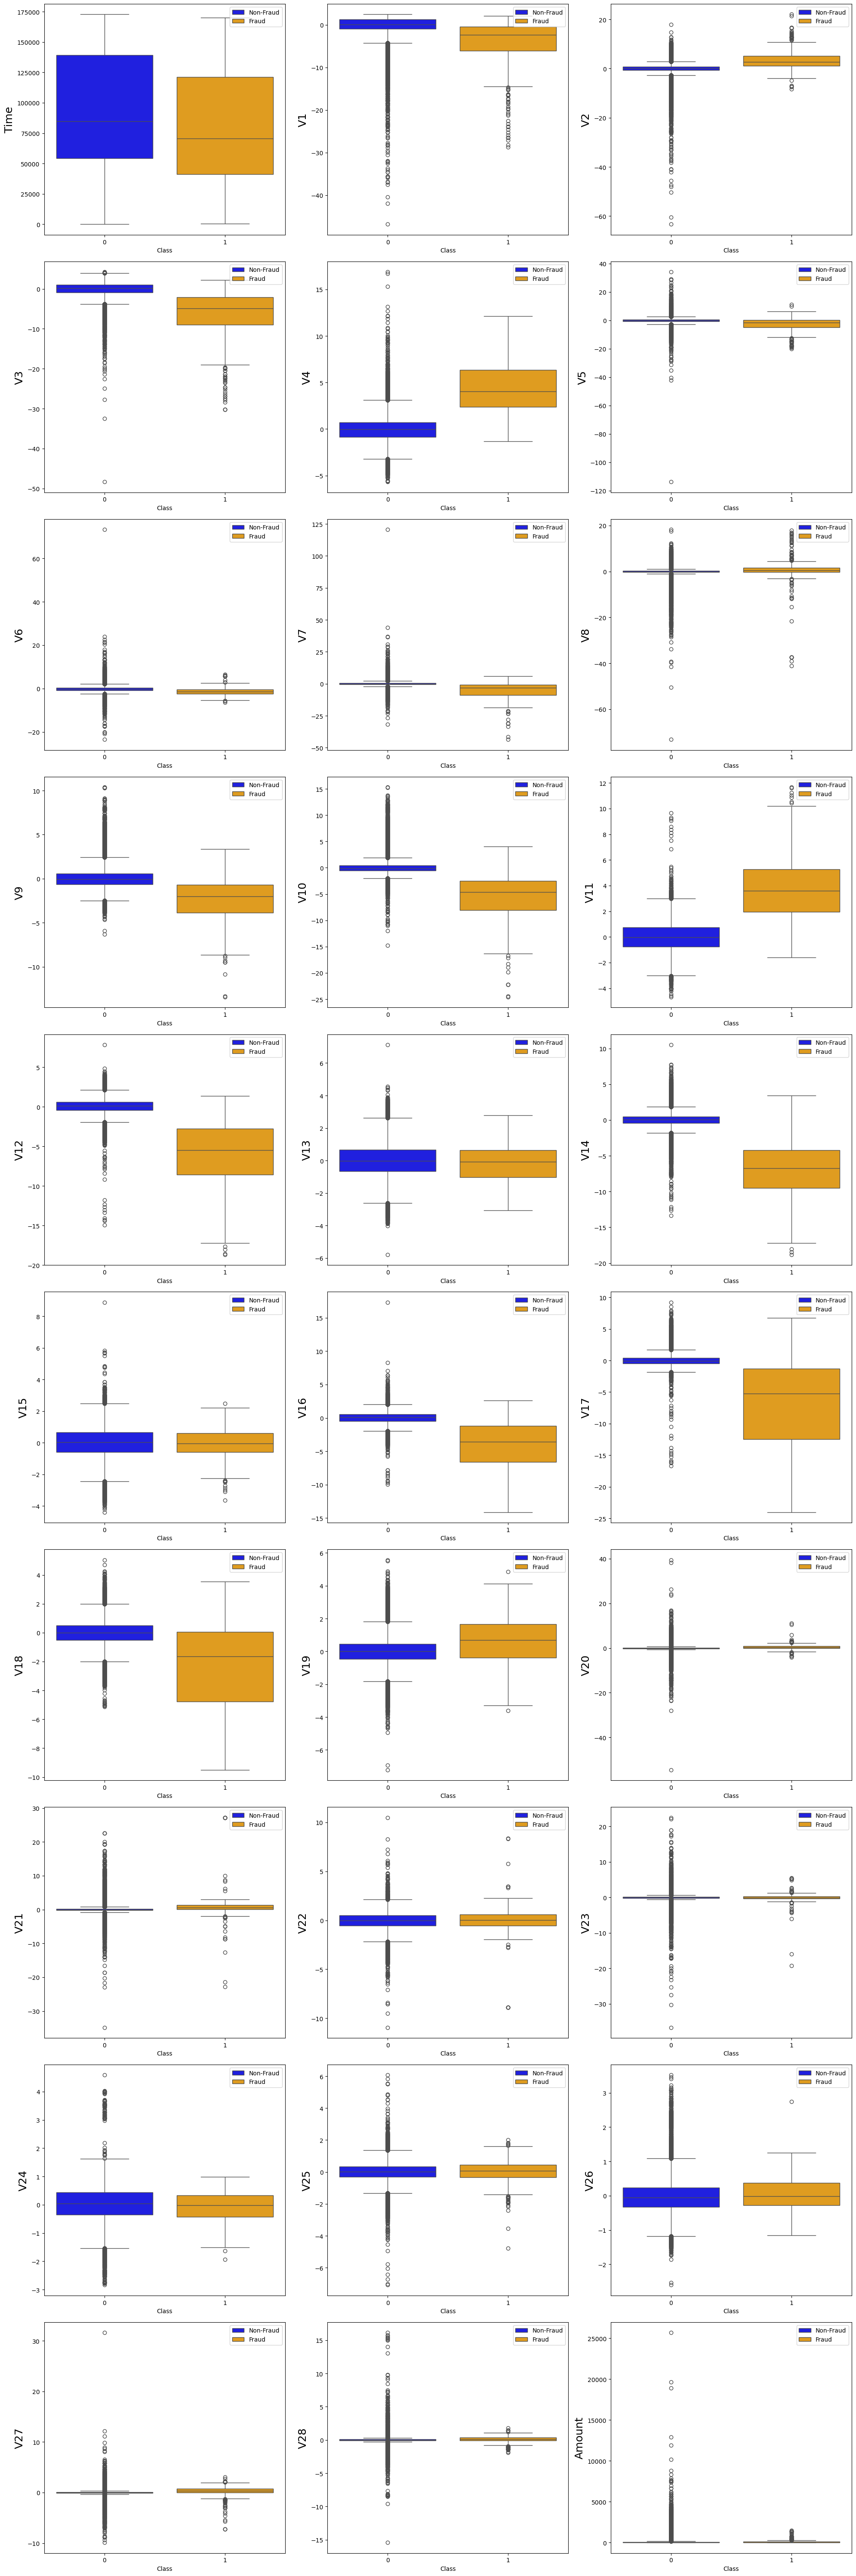

In [16]:

fig=plt.figure(figsize=(20,60))
for i,col in enumerate(df_train.columns.to_list()):
    if col=="Class":
        continue
    plt.subplot(10,3,i+1)
    sns.boxplot(x="Class",y=col,data=df_train,hue='Class',palette=['blue', 'orange'])
    
    plt.xlabel('Class')
    plt.ylabel(col,fontsize=18)

    plt.legend(labels=['Non-Fraud', 'Fraud'], loc='upper right')

plt.tight_layout()
plt.show()


Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.  
Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction. 

BoxPlots: We will use boxplots to have a better understanding of the distribution  features in fradulent and non fradulent transactions.



what i am trying to do know is to check a linear seprability between two calsses 


In [17]:
x=df_train.drop("Class",axis=1)
y=df_train["Class"]
from sklearn.preprocessing import StandardScaler
new_x=StandardScaler().fit_transform(x)
new_x=PCA(2).fit_transform(new_x)
da=pd.DataFrame(data=new_x,columns=["pca1","pca2"])

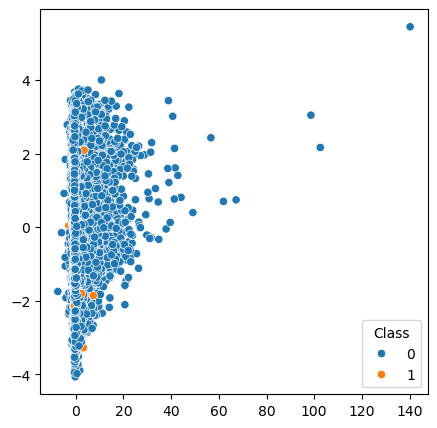

In [18]:
plt.figure(figsize=(5,5))

sns.scatterplot(x=new_x[:,0],y=new_x[:,1],hue=y,data=da)
plt.show()

Note with high imbalance data we cant get really use of visualize so what i am trying to do is to under sample the majoirty 

In [19]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(sampling_strategy={0:10000})
x,y=rus.fit_resample(df_train.drop("Class",axis=1),df_train["Class"])
column_names = df_train.drop("Class", axis=1).columns
df_rus = pd.DataFrame(x, columns=column_names)

In [20]:
df_rus = pd.DataFrame(x, columns=column_names)
df_rus['Class'] = y

df_rus.shape

(10305, 31)

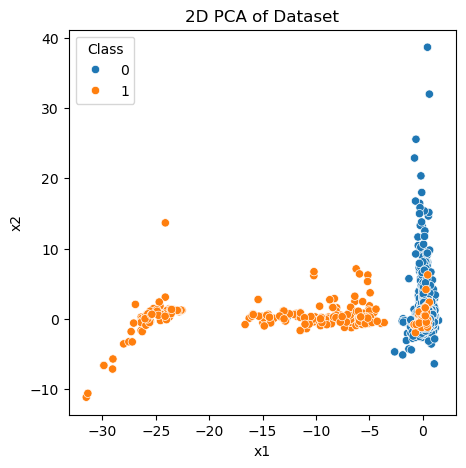

In [21]:
x=df_rus.drop("Class",axis=1)
y=df_rus["Class"]
from sklearn.preprocessing import StandardScaler
new_x=StandardScaler().fit_transform(x)
new_x=PCA(n_components=2).fit_transform(new_x)
da=pd.DataFrame(data=new_x,columns=["pca1","pca2"])
plt.figure(figsize=(5,5))

sns.scatterplot(x=new_x[:,0],y=new_x[:,1],hue=y,data=da)
plt.title('2D PCA of Dataset')
plt.xlabel('x1')
plt.ylabel('x2')


plt.show()

i think we may have good classifier lets try 3d pca

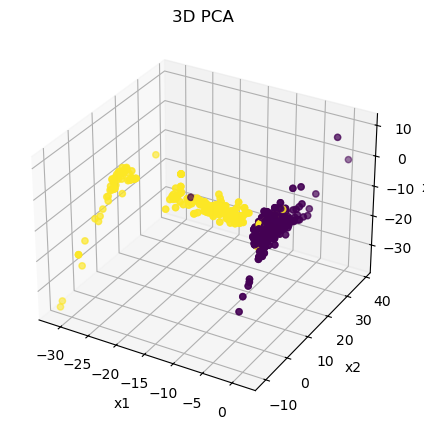

In [22]:
x=df_rus.drop("Class",axis=1)
y=df_rus["Class"]
from sklearn.preprocessing import StandardScaler
new_x=StandardScaler().fit_transform(x)
new_x=PCA(n_components=3).fit_transform(new_x)
da=pd.DataFrame(data=new_x,columns=["PC1","PC2","PC3"])
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(da['PC1'], da['PC2'], da['PC3'], c=y)


scatter = ax.scatter(da['PC1'], da['PC2'], da['PC3'], c=y)

ax.set_title('3D PCA')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.show()




i think we could have good sperable model here , i think they can have like a geometric relationship


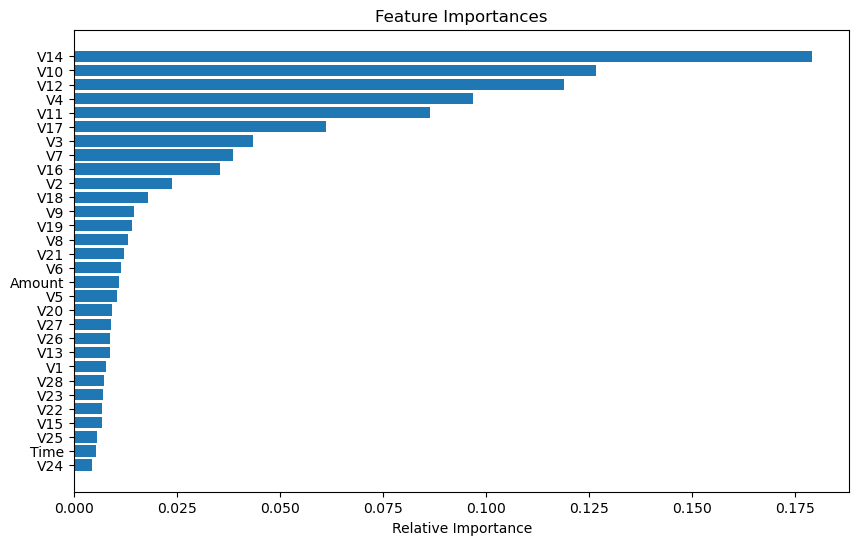

In [26]:
# feature importance by random forest
from helper_utils import load_model

model_path = 'Models&Figures/Trained_Models.pkl' 
model = load_model(model_path) 

rf = model['random_forest']['model']

feats = rf.feature_importances_
feature_names = df_train.columns

indices = np.argsort(feats)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), feats[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()